# Interactive visualization
http://htmlpreview.github.io/?https://github.com/hsnee/CMU-DSC-Talks/blob/master/Data_Visualization/InteractiveVisualization.html
https://github.com/hsnee/CMU-DSC-Talks/tree/master/Data_Visualization 

Good for presentation, making websites, or understanding data better

# Plotly
https://plot.ly
- online graphing, data analytics, visualization tools, and statistics tools
- scientific graphing libraries for Python, R, JavaScript, MATLAB, Perl, Julia, Arduino...

# Plotly.py
https://plot.ly/python/
- graphing libraries for Python

# Installation
- pip install --upgrade plotly
- conda install plotly

In [1]:
import plotly

plotly.__version__

'3.5.0'

# Jupyter notebook 

Check here https://jupyter.org/install.html to install the notebook

# Example: scatter plot

Generate mock data: 
- x: 1d array with 100 elements
- y: 1d array with 100 elements

In [2]:
import numpy as np

N = 100
x = np.random.rand(N)
y = np.random.rand(N)

In [3]:
print(x)

[0.42561251 0.07336182 0.30427577 0.12173632 0.37689624 0.64178833
 0.99088434 0.68533488 0.64635634 0.88103018 0.53309063 0.3488401
 0.58109495 0.88990012 0.65240211 0.5643629  0.54697914 0.97158375
 0.16058677 0.50610556 0.92386773 0.73106129 0.78929158 0.66215982
 0.05271842 0.77357485 0.12861826 0.6733157  0.41679637 0.81589988
 0.3255669  0.18318948 0.67998481 0.67671203 0.6934387  0.71393145
 0.74648206 0.67250241 0.81831562 0.58928355 0.00621107 0.69942863
 0.55731215 0.16877791 0.01224259 0.50953526 0.89944074 0.58069129
 0.53635026 0.73720611 0.86943098 0.50435429 0.95703323 0.24632525
 0.23112025 0.29193337 0.96353336 0.72001658 0.79598863 0.07619422
 0.31741346 0.96043096 0.58398329 0.50126862 0.27594398 0.67308866
 0.0685546  0.18428276 0.67971216 0.75184057 0.08264971 0.92173675
 0.93903427 0.19429078 0.34038986 0.8604601  0.12765138 0.38446058
 0.14190106 0.92069963 0.97559655 0.31594776 0.05668416 0.53655765
 0.61169261 0.96896608 0.20612634 0.94625671 0.01203604 0.76938

# Using matplotlib: 
The basic python plot

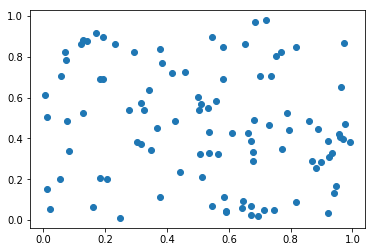

In [5]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o')
plt.show()

# Using plotly: 'Offline' mode
There are 'online' and 'offline' modes when using plotly:
- online mode: one has to create an account and then is able to do a lot of things in the web. 
- offline mode: one can make plots locally. 

In [6]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

Set offline mode

In [7]:
init_notebook_mode(connected=True)

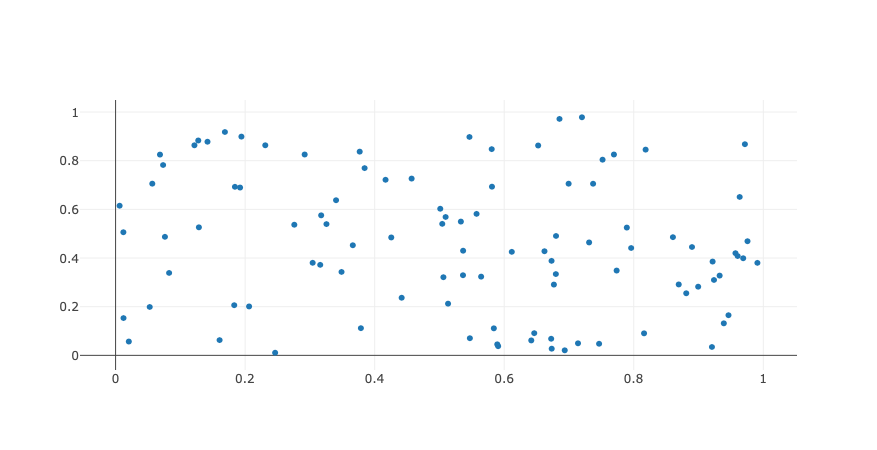

In [8]:
fig = go.Figure()

fig.add_scatter(x=x,
                y=y,
                mode='markers')    # markers, lines or both

iplot(fig)

# More information of the data
Mock other quantities for each data point:

In [9]:
colors = np.random.rand(N)
sz = np.random.rand(N) * 30

ids = list(range(N))

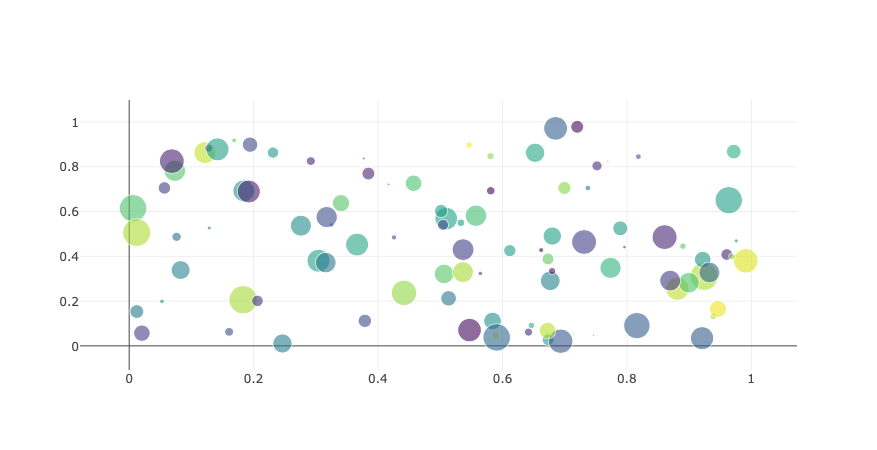

In [10]:
fig = go.Figure()

fig.add_scatter(x=x,
                y=y,
                mode='markers',
                hovertext=ids,
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'})

iplot(fig)

Layout of the plot

In [11]:
layout = go.Layout(title='SCATTER PLOT',
                   xaxis={'title':'x'},
                   yaxis={'title':'y'},
                   hovermode='closest')

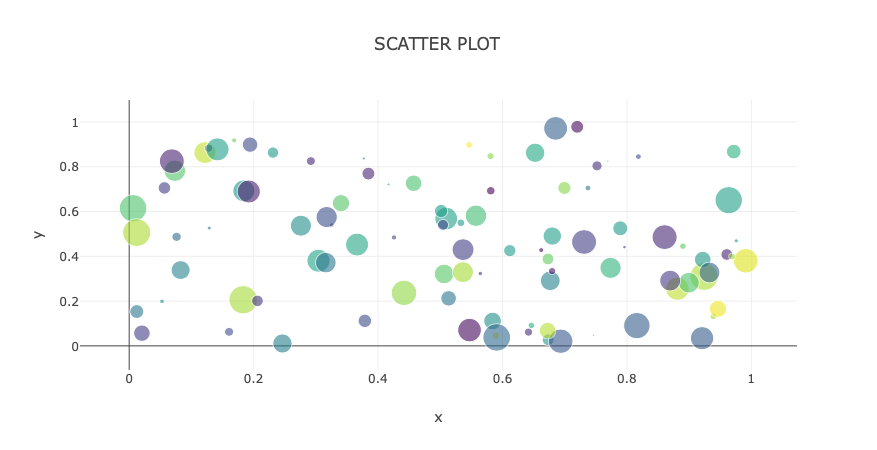

In [12]:
fig = go.Figure(layout=layout)

fig.add_scatter(x=x,
                y=y,
                mode='markers',
                hovertext=ids,
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'})
iplot(fig)

ref: https://plot.ly/python/static-image-export/

# Example: line plot ---Bessel functions

In [13]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [14]:
import numpy as np
from scipy import special  # calling bessel function jv

x = np.linspace(0, np.pi, 300)

In [15]:
layout = go.Layout(title='<b>BESSEL FUNCTION</b>',
                   yaxis={'title':'<i>bessel 1</i>'},
                   xaxis={'title':'<i>x</i>'})

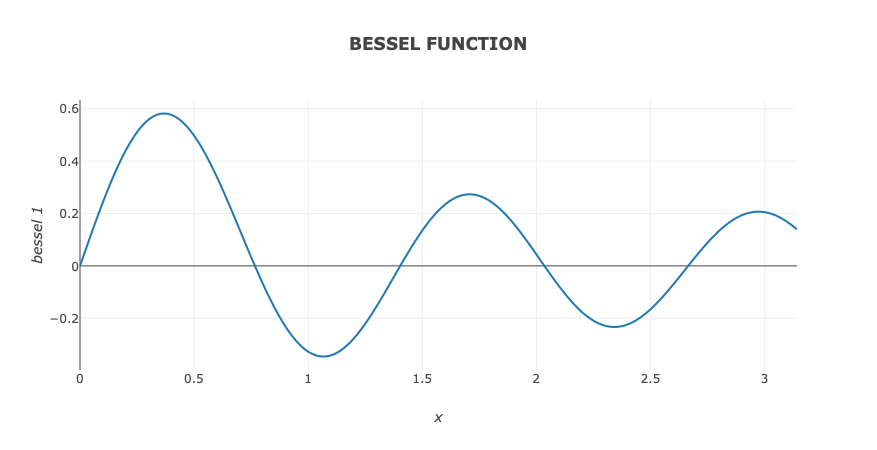

In [16]:
freq = 5

trace = go.Scatter(x=x,
                   y=special.jv(1, freq * x),
                   mode='lines',    # markers or both
                   line={'shape':'spline'})

fig = go.Figure(data=[trace], layout=layout)

iplot(fig)

# More channels?
- Different order of bessel functions?
- Different frequency?


# Widgets 

In [17]:
from ipywidgets import interactive
import ipywidgets as widgets

<br>
Select widget:

In [18]:
orders = widgets.SelectMultiple(options=list(range(6)), 
                                value=(0, ),    # default value
                                description='Bessel Order')
orders

SelectMultiple(description='Bessel Order', index=(0,), options=(0, 1, 2, 3, 4, 5), value=(0,))

<br>
Slider widget:

In [19]:
freq = widgets.FloatSlider(min=5, max=20, value=5, description='Freq')
freq

FloatSlider(value=5.0, description='Freq', max=20.0, min=5.0)

In [20]:
def update_plot(orders, freq):
    """
    This function updates the plot everytime a widget is changed
    """
    
    data = []
    
    for order in orders:
        trace = go.Scatter(x=x,
                           y=special.jv(order, freq * x),
                           mode='lines',
                           name='bessel {}'.format(order),
                           line={'shape':'spline'})
        data.append(trace)

    fig = go.Figure(data=data, layout=layout)
    
    iplot(fig)
    

widgets.interactive(update_plot, freq=freq, orders=orders)


interactive(children=(SelectMultiple(description='Bessel Order', index=(0,), options=(0, 1, 2, 3, 4, 5), value…

ref:
- tutorial video: https://www.youtube.com/watch?v=XUNaGFa9xCM
- github: https://github.com/markjay4k/fourier-transform/blob/master/plotly_bessel_example.ipynb